# Dynamic Time Warping
> Distance of Time Series

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

INF = float('inf')

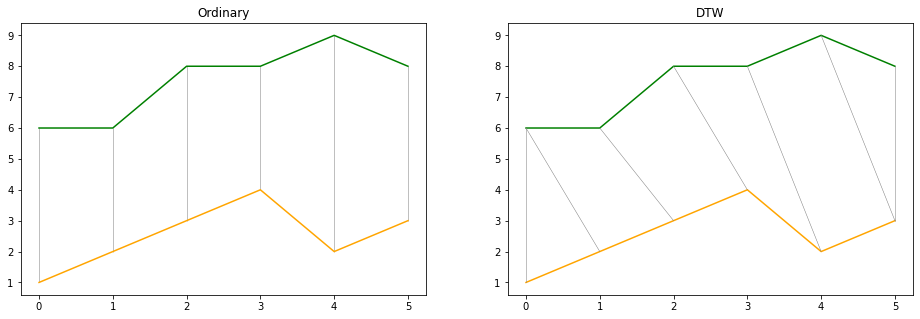


---------------
  DTW Matrix
---------------

[[ 0. inf inf inf inf inf inf]
 [inf  0.  1.  3.  6.  7.  9.]
 [inf  0.  1.  3.  6.  7.  9.]
 [inf  2.  1.  1.  2.  3.  3.]
 [inf  4.  2.  1.  2.  3.  3.]
 [inf  7.  4.  2.  1.  3.  4.]
 [inf  9.  5.  2.  2.  2.  2.]]

--------
  Path
--------

(6, 6) => (6, 5) => (5, 4) => (4, 3) => (3, 2) => (2, 1) => (1, 1)


In [54]:
def DTW(A, B) :
    '''
    A : Time Series 1
    B : Time Series 2
    '''
    
    # 초기화
    cost = np.array([[INF] * (len(A) + 1) for _ in range(len(B) + 1)])
    cost[0, 0] = 0
    
    # 행렬 채우기
    for i in range(1, len(B) + 1) :
        for j in range(1, len(A) + 1) :
            diff = abs(A[j-1] - B[i-1])
            cost[i,j] = diff + min(cost[i-1,j], cost[i,j-1], cost[i-1,j-1])
            
    # 최적 경로 구하기
    row, col = len(B), len(A)
    path = [(row, col)]
    
    while (row, col) != (1, 1) :
        row, col = min((row-1, col-1), (row-1, col), (row, col-1), key = lambda x : cost[x[0], x[1]])
        path.append((row, col))
    
    return cost, path

def plot_DTW(A, B, path, offset = 5, step = 1) :
    plt.figure(figsize = (16,5))
    
    plt.subplot(1,2,1)
    plt.plot(A, c = 'orange')
    plt.plot(B + offset, c = 'green')
    idx = range(0, len(A), step)
    plt.vlines(idx, A[idx], (B + offset)[idx], color = 'gray', linewidth = 0.5)
    plt.title('Ordinary')
    
    plt.subplot(1,2,2)
    plt.plot(A, c = 'orange')
    plt.plot(B + offset, c = 'green')
    for x1, x2 in path[::step] :
        x1, x2 = x1-1, x2-1
        plt.plot([x1, x2], [A[x1], B[x2] + offset], c = 'gray', linewidth = 0.5)
    plt.title('DTW')
    plt.show()

# Time Series
A = np.array([1,2,3,4,2,3])
B = np.array([7,8,5,9,11,9])
B = np.array([1,1,3,3,4,3])


cost, path = DTW(A, B)
plot_DTW(A, B, path)
print('\n---------------')
print('  DTW Matrix')
print('---------------\n')
print(cost)

print('\n--------')
print('  Path')
print('--------\n')
print(' => '.join([str(t) for t in path]))

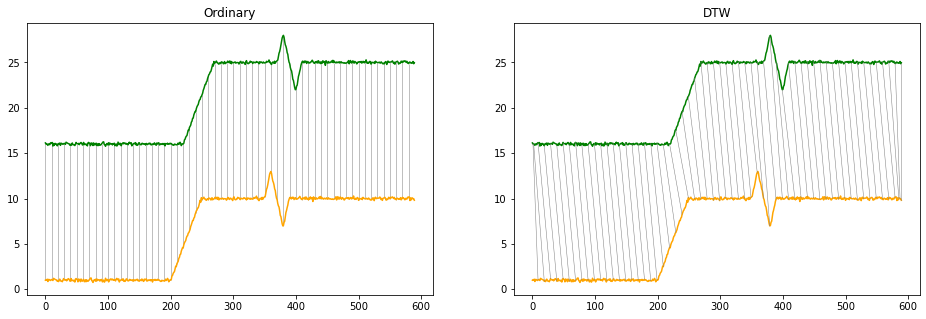

In [55]:
A = np.concatenate([np.array([1] * 200),
                    np.linspace(1, 10, 50),
                    np.array([10] * 100),
                    np.linspace(10, 13, 10),
                    np.linspace(13, 7, 20),
                    np.linspace(7, 10, 10),
                    np.array([10] * 200)])
A += np.random.randn(len(A)) / 10
B = np.concatenate([A[-20:] - 9,
                   A[:-20]])

cost, path = DTW(A, B)
plot_DTW(A, B, path, offset = 15, step = 10)

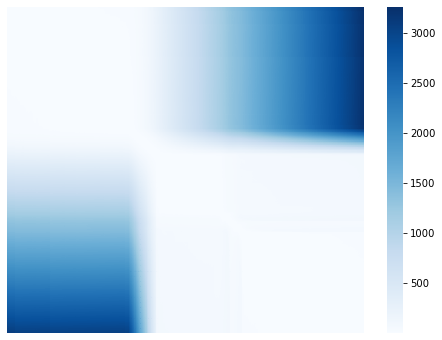

In [58]:
plt.figure(figsize = (8,6))
sns.heatmap(cost[1:, 1:], cmap = 'Blues')

plt.axis(False)
plt.show()

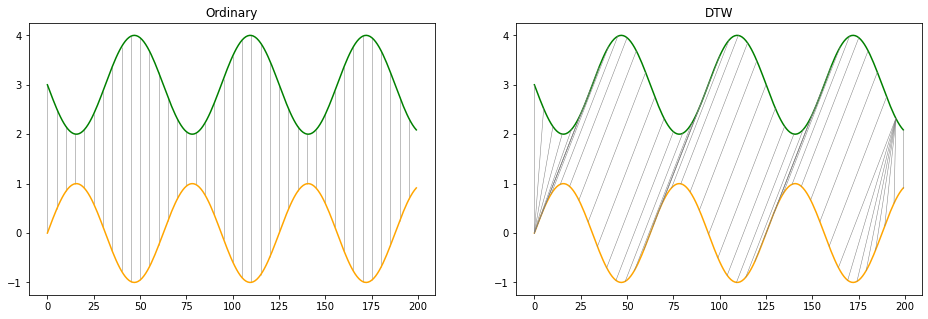

In [77]:
X = np.linspace(0, 20, 200)
A = np.sin(X)
B = np.cos(X)
B = -A

cost, path = DTW(A, B)
plot_DTW(A, B, path, offset = 3, step = 5)

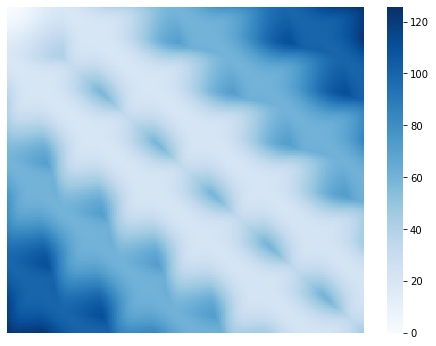

In [78]:
plt.figure(figsize = (8,6))
sns.heatmap(cost[1:, 1:], cmap = 'Blues')

plt.axis(False)
plt.show()

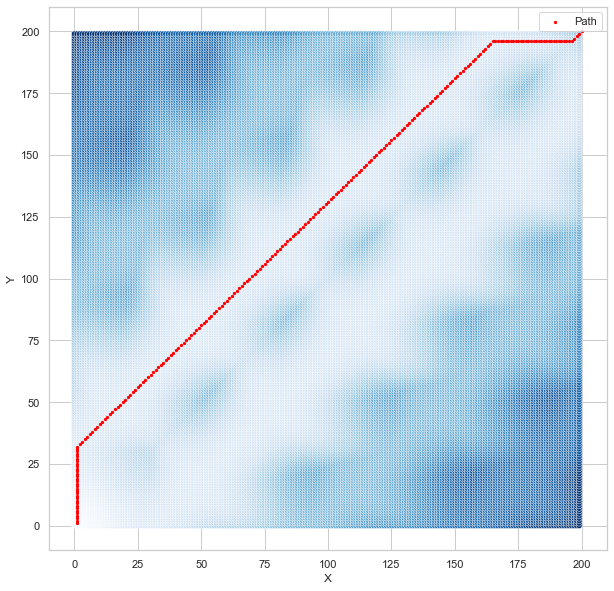

In [119]:
temp = cost[1:, 1:]
# temp = temp[::5, ::5]
temp2 = []
for i in range(temp.shape[0]) :
    for j in range(temp.shape[1]) :
        temp2.append([i, j, temp[i, j]])
        
temp2 = np.array(temp2)
temp2 = pd.DataFrame(temp2, columns = ['X', 'Y', 'W'])

plt.figure(figsize = (10,10))
sns.scatterplot(data = temp2, x = 'X', y = 'Y', hue = 'W', palette = 'Blues', legend = None)
path2 = np.array(path)
plt.scatter(path2[:, 0], path2[:, 1], c = 'red', s = 5, label = 'Path')
plt.legend()
plt.show()